## Classfication

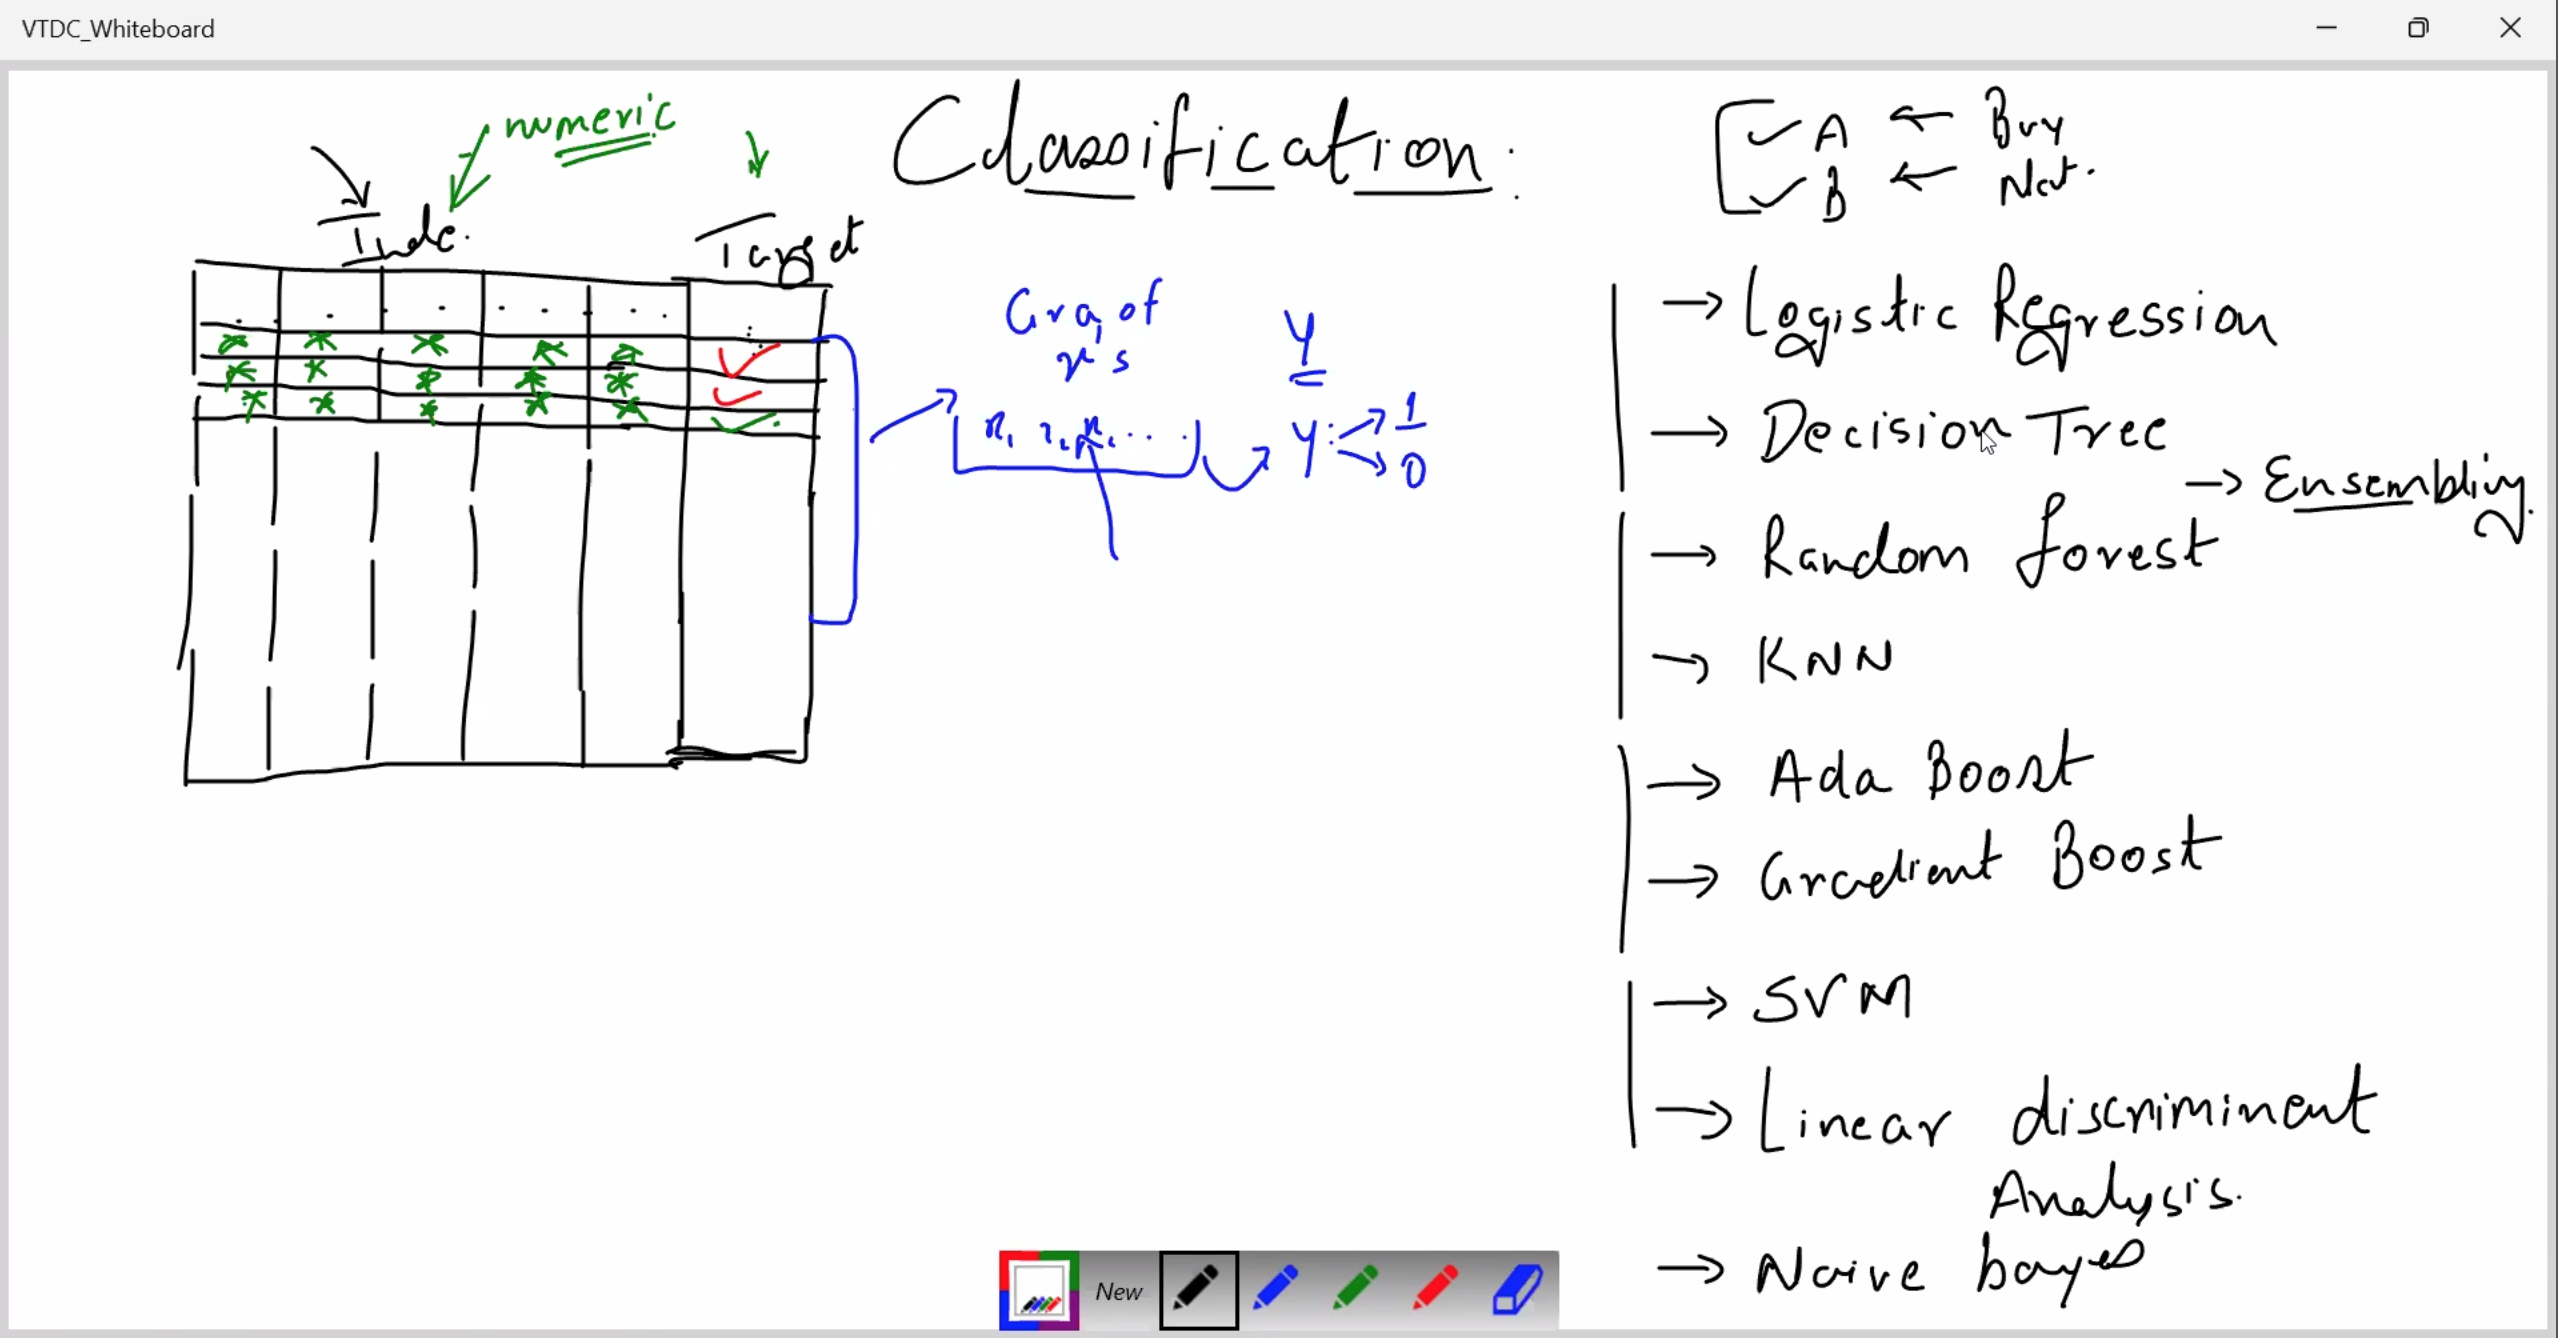
Native Bay's Perform way beyond all algo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
Tel_data = pd.read_csv('Telecom_Churn.csv')


In [32]:
Tel_data.drop(['Unnamed: 20','Unnamed: 21','Unnamed: 22'],axis = 1,inplace = True)


In [33]:
Tel_data.isnull().sum()


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [34]:
num=[]
cat=[]
for i in Tel_data.drop('Churn',axis=1, inplace=False).columns:
    if Tel_data[i].dtype != 'object':
        num.append(i)
    else:
        cat.append(i)

In [35]:
cat

['State', 'International plan', 'Voice mail plan']

In [36]:
num

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

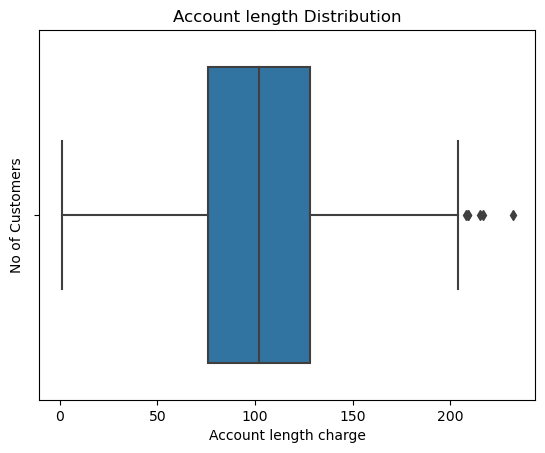

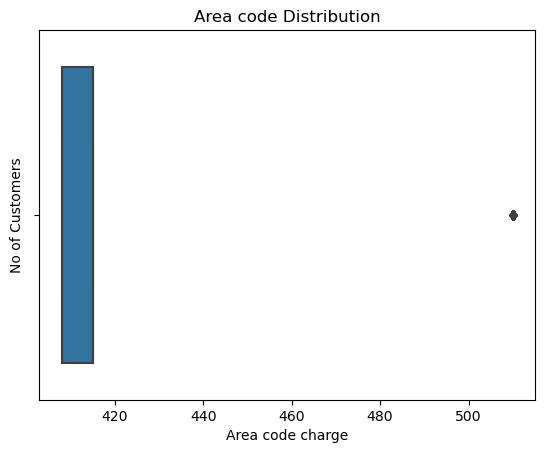

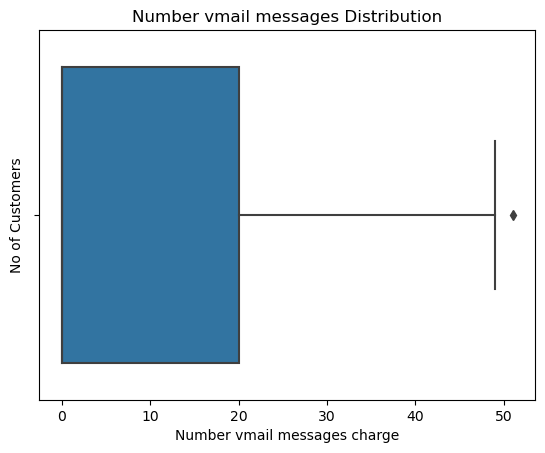

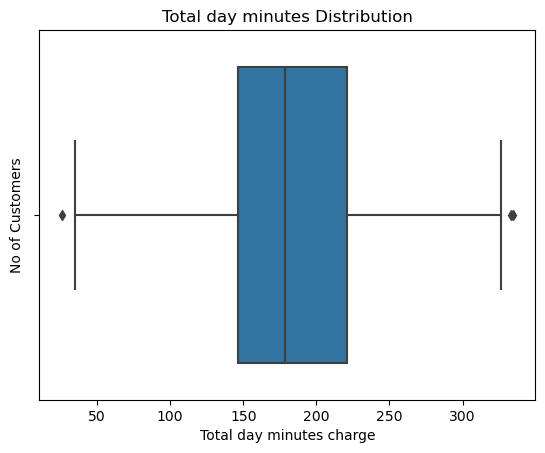

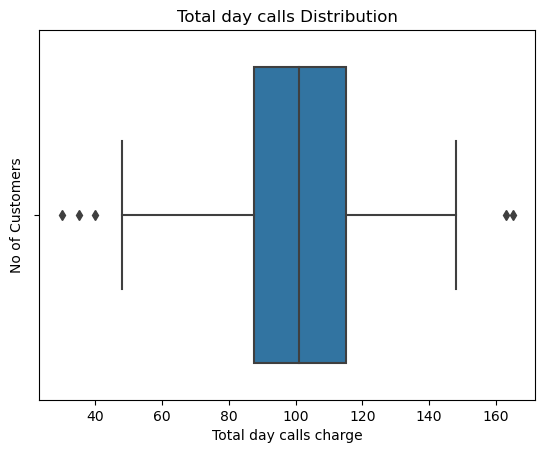

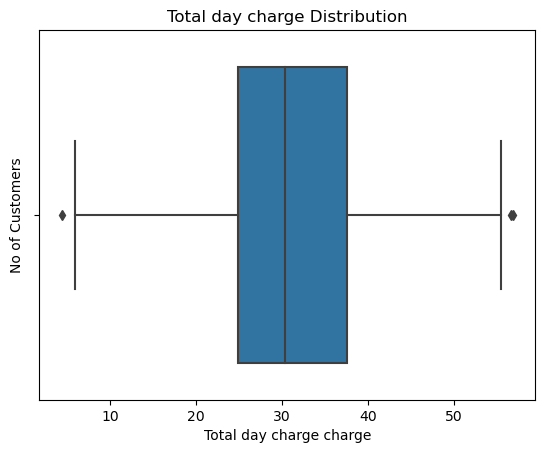

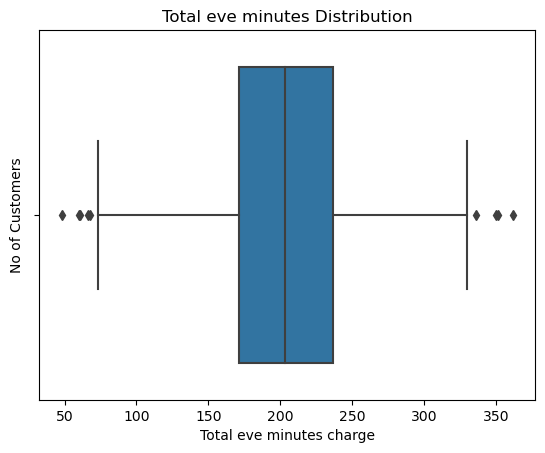

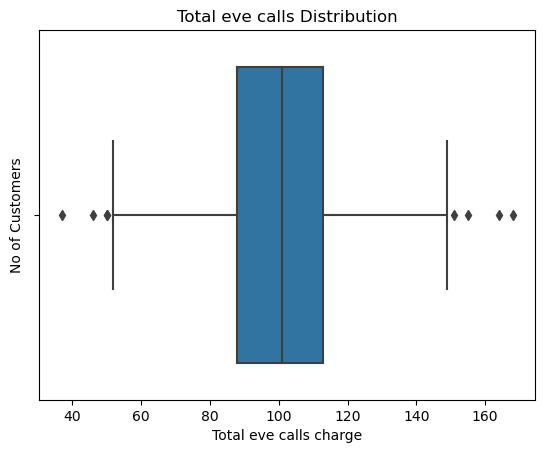

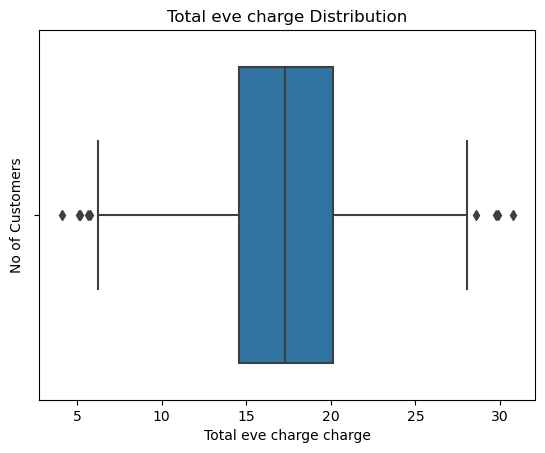

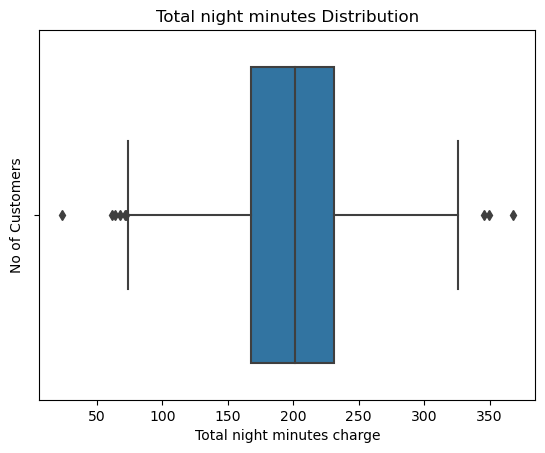

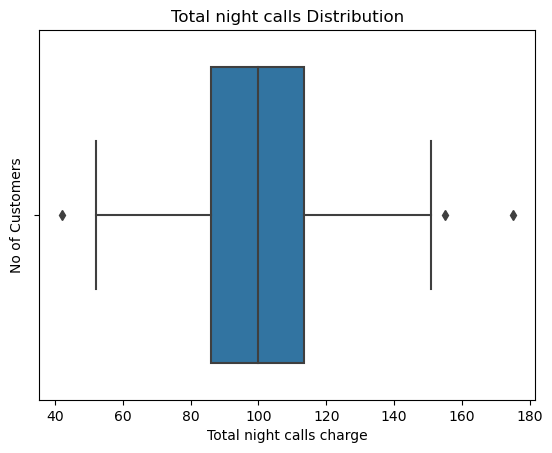

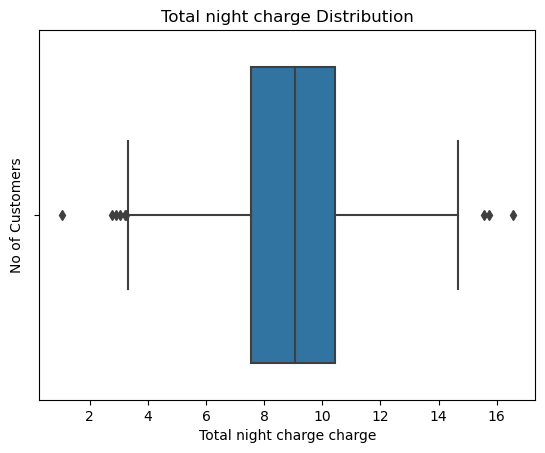

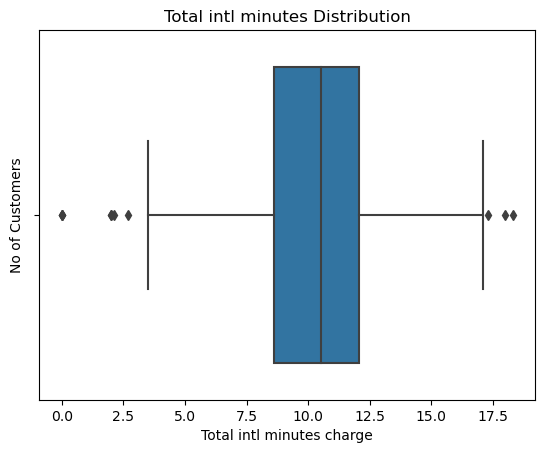

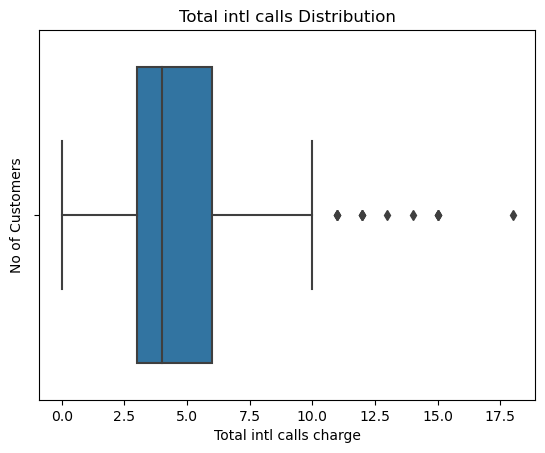

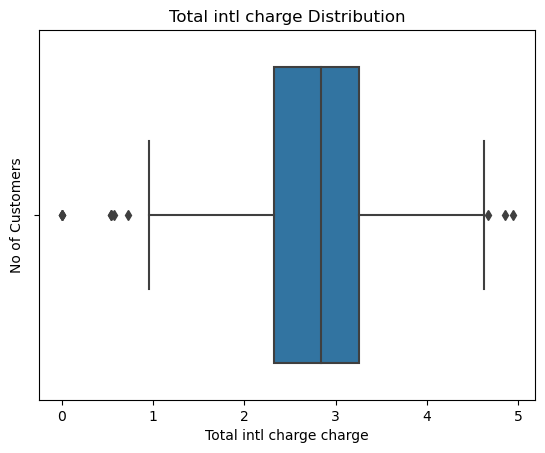

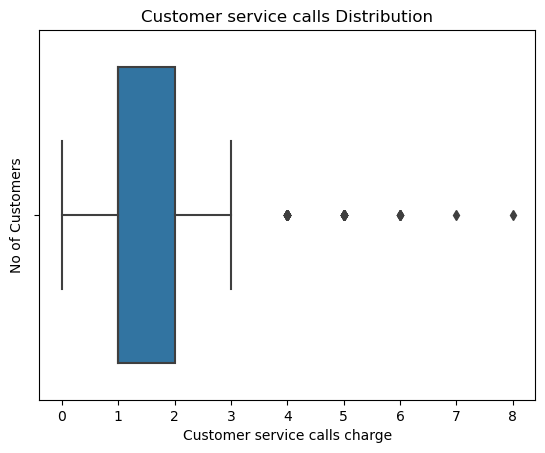

In [37]:
for i in num:
    ax = sns.boxplot(data = Tel_data,x = i)
    ax.set(title='{} Distribution'.format(i), xlabel='{} charge'.format(i), ylabel='No of Customers')
    plt.show()

In [38]:
Tel_data.duplicated().sum()

0

In [39]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [40]:
for col in num:
    lr,ur = remove_outlier(Tel_data[col])
    Tel_data[col] = np.where(Tel_data[col]>ur,ur,Tel_data[col])
    Tel_data[col] = np.where(Tel_data[col]<lr,lr,Tel_data[col])

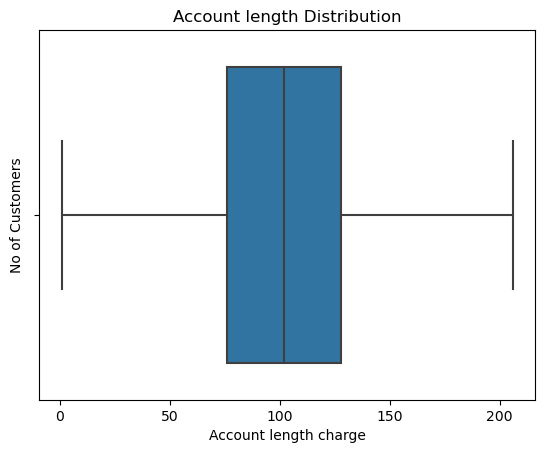

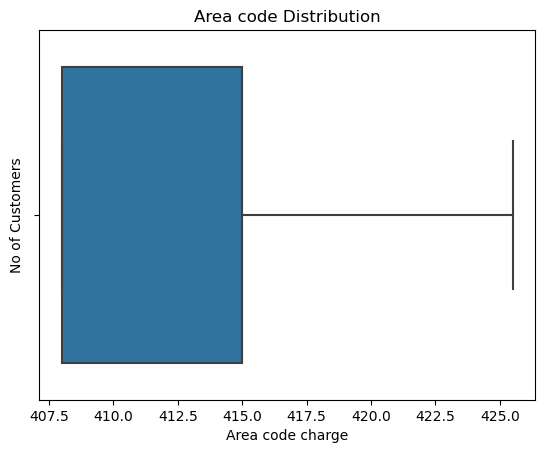

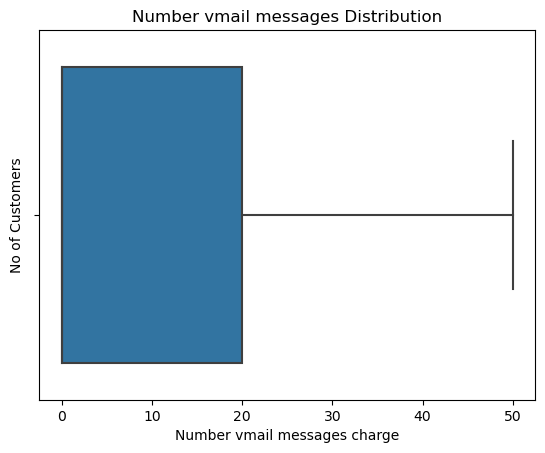

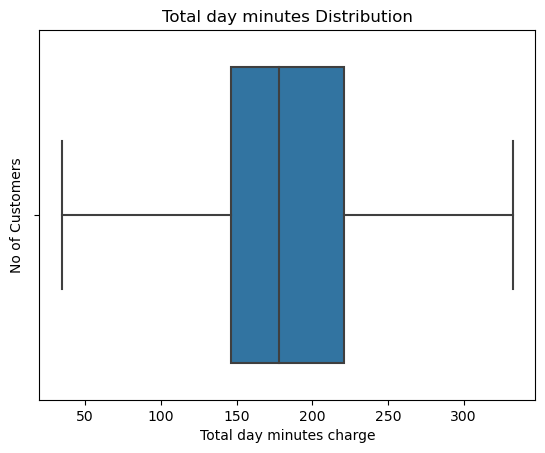

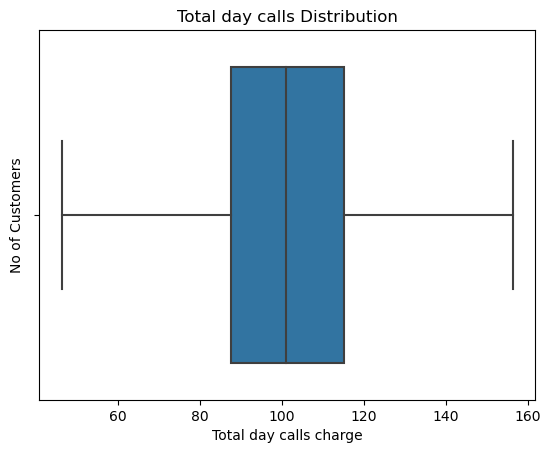

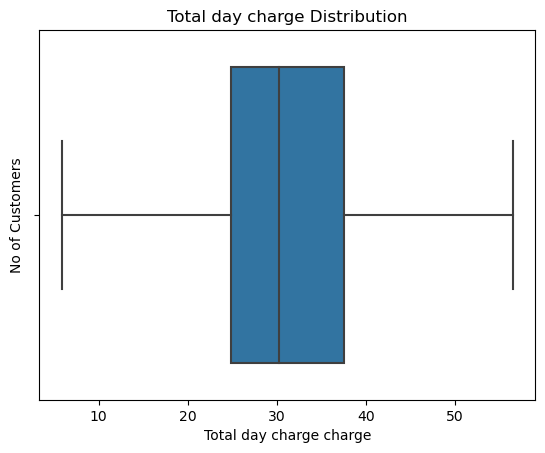

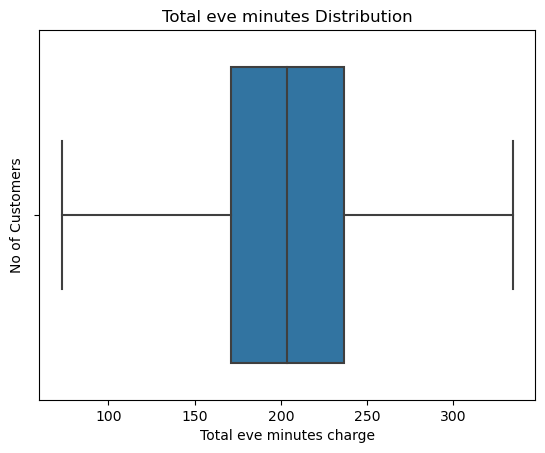

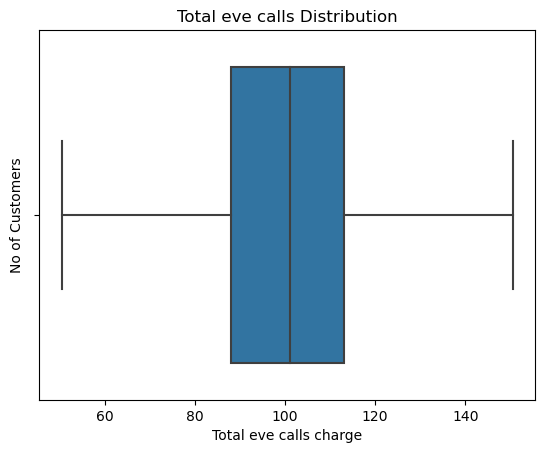

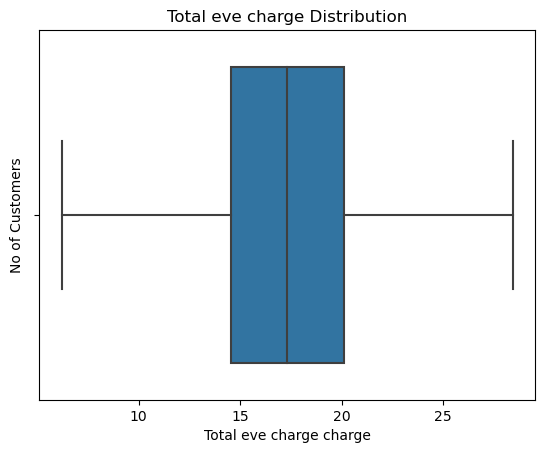

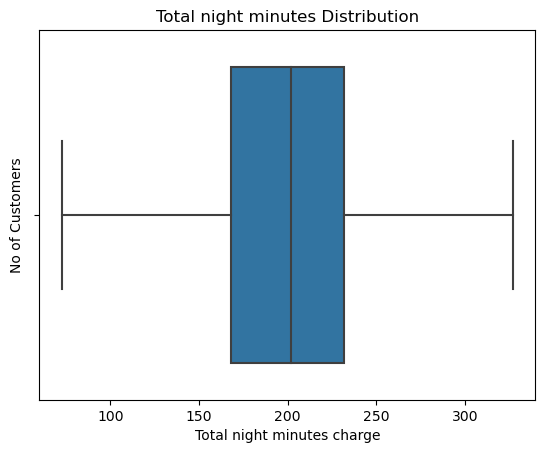

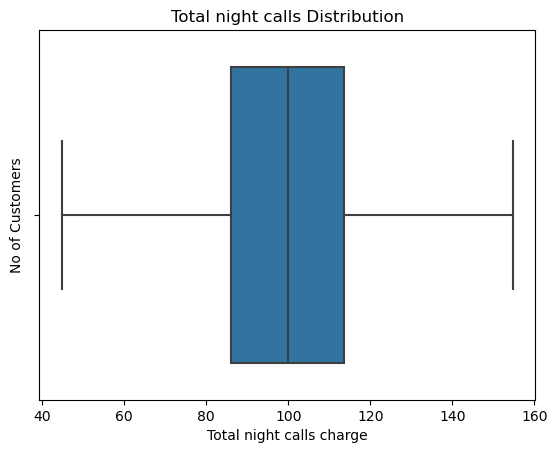

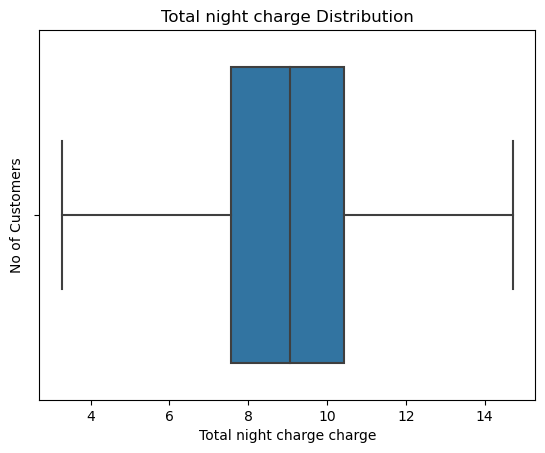

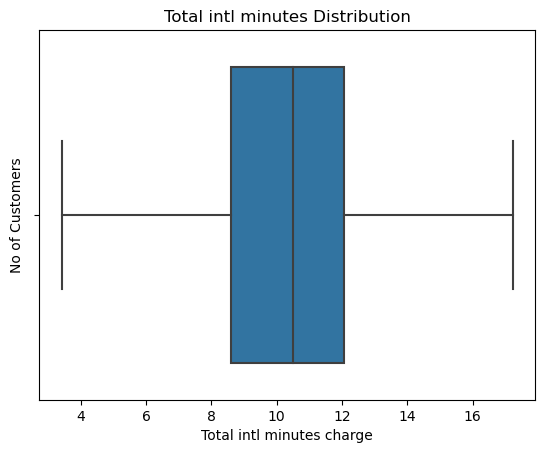

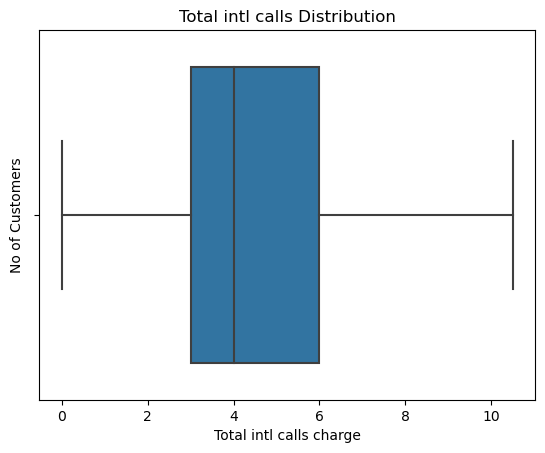

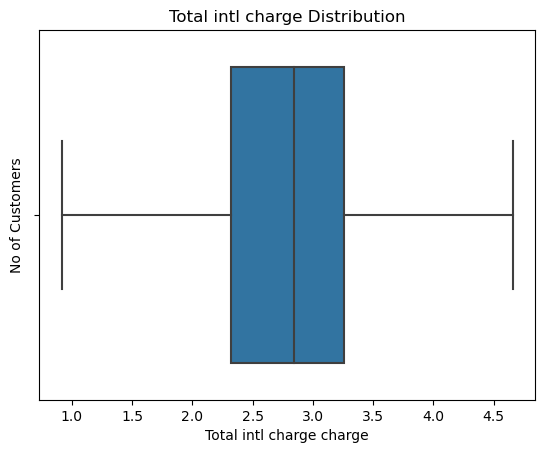

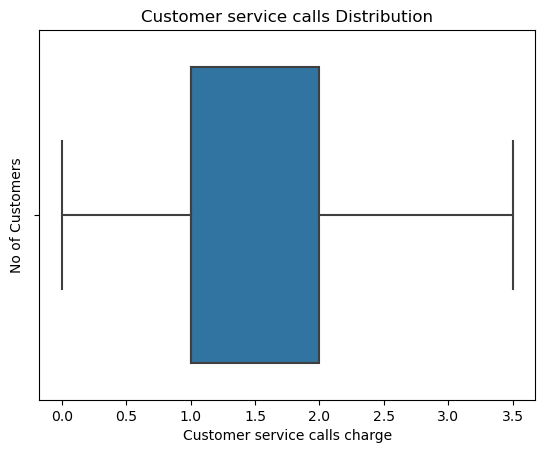

In [41]:
for i in num:
    ax = sns.boxplot(data = Tel_data,x = i)
    ax.set(title='{} Distribution'.format(i), xlabel='{} charge'.format(i), ylabel='No of Customers')
    plt.show()

In [42]:
Tel_data[cat]


State International plan Voice mail plan
0      LA                 No              No
1      IN                 No              No
2      NY                 No              No
3      SC                 No              No
4      HI                 No              No
..    ...                ...             ...
662    WI                 No             Yes
663    AL                 No             Yes
664    VT                 No              No
665    WV                 No              No
666    CT                Yes              No

[667 rows x 3 columns]

In [43]:
Tel_data.drop('State',axis=1,inplace = True)


In [44]:
num=[]
cat=[]
for i in Tel_data.columns:
    if Tel_data[i].dtype != 'object':
        num.append(i)
    else:
        cat.append(i)

In [45]:
Tel_data.replace(to_replace = ['No','Yes'],value = [0,1], inplace = True)


In [47]:
Tel_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          667 non-null    float64
 1   Area code               667 non-null    float64
 2   International plan      667 non-null    int64  
 3   Voice mail plan         667 non-null    int64  
 4   Number vmail messages   667 non-null    float64
 5   Total day minutes       667 non-null    float64
 6   Total day calls         667 non-null    float64
 7   Total day charge        667 non-null    float64
 8   Total eve minutes       667 non-null    float64
 9   Total eve calls         667 non-null    float64
 10  Total eve charge        667 non-null    float64
 11  Total night minutes     667 non-null    float64
 12  Total night calls       667 non-null    float64
 13  Total night charge      667 non-null    float64
 14  Total intl minutes      667 non-null    fl

In [48]:
num

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

In [49]:
cat

['International plan', 'Voice mail plan']

In [50]:
Tel_data.replace(to_replace = ['False','True'],value = [0,1], inplace = True) #1 - Churn out from system #0 - Stay in system
Tel_data
#to_replace - Works only on string and hence it won't work

In [51]:
Tel_data

Account length  Area code  International plan  Voice mail plan  \
0             117.0      408.0                   0                0   
1              65.0      415.0                   0                0   
2             161.0      415.0                   0                0   
3             111.0      415.0                   0                0   
4              49.0      425.5                   0                0   
..              ...        ...                 ...              ...   
662           114.0      415.0                   0                1   
663           106.0      408.0                   0                1   
664            60.0      415.0                   0                0   
665           159.0      415.0                   0                0   
666           184.0      425.5                   1                0   

     Number vmail messages  Total day minutes  Total day calls  \
0                      0.0            184.500             97.0   
1                      0.0            129.100            137.0   
2                      0.0            332.375             67.0   
3                      0.0            110.400            103.0   
4                      0.0            119.300            117.0   
..                     ...                ...              ...   
662                   26.0            137.100             88.0   
663                   29.0             83.600            131.0   
664                    0.0            193.900            118.0   
665                    0.0            169.800            114.0   
666                    0.0            213.800            105.0   

     Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0               31.37             334.55             80.0           28.4275   
1               21.95             228.50             83.0           19.4200   
2               56.51             317.80             97.0           27.0100   
3               18.77             137.30            102.0           11.6700   
4               20.28             215.10            109.0           18.2800   
..                ...                ...              ...               ...   
662             23.31             155.70            125.0           13.2300   
663             14.21             203.90            131.0           17.3300   
664             32.96              85.00            110.0            7.2300   
665             28.87             197.70            105.0           16.8000   
666             36.35             159.60             84.0           13.5700   

     Total night minutes  Total night calls  Total night charge  \
0                  215.8               90.0                9.71   
1                  208.8              111.0                9.40   
2                  160.6              128.0                7.23   
3                  189.6              105.0                8.53   
4                  178.7               90.0                8.04   
..                   ...                ...                 ...   
662                247.6               94.0               11.14   
663                229.5               73.0               10.33   
664                210.1              134.0                9.45   
665                193.7               82.0                8.72   
666                139.2              137.0                6.26   

     Total intl minutes  Total intl calls  Total intl charge  \
0                   8.7               4.0               2.35   
1                  12.7               6.0               3.43   
2                   5.4               9.0               1.46   
3                   7.7               6.0               2.08   
4                  11.1               1.0               3.00   
..                  ...               ...                ...   
662                11.5               7.0               3.11   
663                 8.1               3.0               2.19   
664                13.2      

In [53]:
Tel_data.replace(to_replace = [False,True],value = [0,1], inplace = True) #1 - Churn out from system #0 - Stay in system
Tel_data #Remove quote from True and False as its Bool type

Account length  Area code  International plan  Voice mail plan  \
0             117.0      408.0                   0                0   
1              65.0      415.0                   0                0   
2             161.0      415.0                   0                0   
3             111.0      415.0                   0                0   
4              49.0      425.5                   0                0   
..              ...        ...                 ...              ...   
662           114.0      415.0                   0                1   
663           106.0      408.0                   0                1   
664            60.0      415.0                   0                0   
665           159.0      415.0                   0                0   
666           184.0      425.5                   1                0   

     Number vmail messages  Total day minutes  Total day calls  \
0                      0.0            184.500             97.0   
1                      0.0            129.100            137.0   
2                      0.0            332.375             67.0   
3                      0.0            110.400            103.0   
4                      0.0            119.300            117.0   
..                     ...                ...              ...   
662                   26.0            137.100             88.0   
663                   29.0             83.600            131.0   
664                    0.0            193.900            118.0   
665                    0.0            169.800            114.0   
666                    0.0            213.800            105.0   

     Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0               31.37             334.55             80.0           28.4275   
1               21.95             228.50             83.0           19.4200   
2               56.51             317.80             97.0           27.0100   
3               18.77             137.30            102.0           11.6700   
4               20.28             215.10            109.0           18.2800   
..                ...                ...              ...               ...   
662             23.31             155.70            125.0           13.2300   
663             14.21             203.90            131.0           17.3300   
664             32.96              85.00            110.0            7.2300   
665             28.87             197.70            105.0           16.8000   
666             36.35             159.60             84.0           13.5700   

     Total night minutes  Total night calls  Total night charge  \
0                  215.8               90.0                9.71   
1                  208.8              111.0                9.40   
2                  160.6              128.0                7.23   
3                  189.6              105.0                8.53   
4                  178.7               90.0                8.04   
..                   ...                ...                 ...   
662                247.6               94.0               11.14   
663                229.5               73.0               10.33   
664                210.1              134.0                9.45   
665                193.7               82.0                8.72   
666                139.2              137.0                6.26   

     Total intl minutes  Total intl calls  Total intl charge  \
0                   8.7               4.0               2.35   
1                  12.7               6.0               3.43   
2                   5.4               9.0               1.46   
3                   7.7               6.0               2.08   
4                  11.1               1.0               3.00   
..                  ...               ...                ...   
662                11.5               7.0               3.11   
663                 8.1               3.0               2.19   
664                13.2      

## Logistic Regression

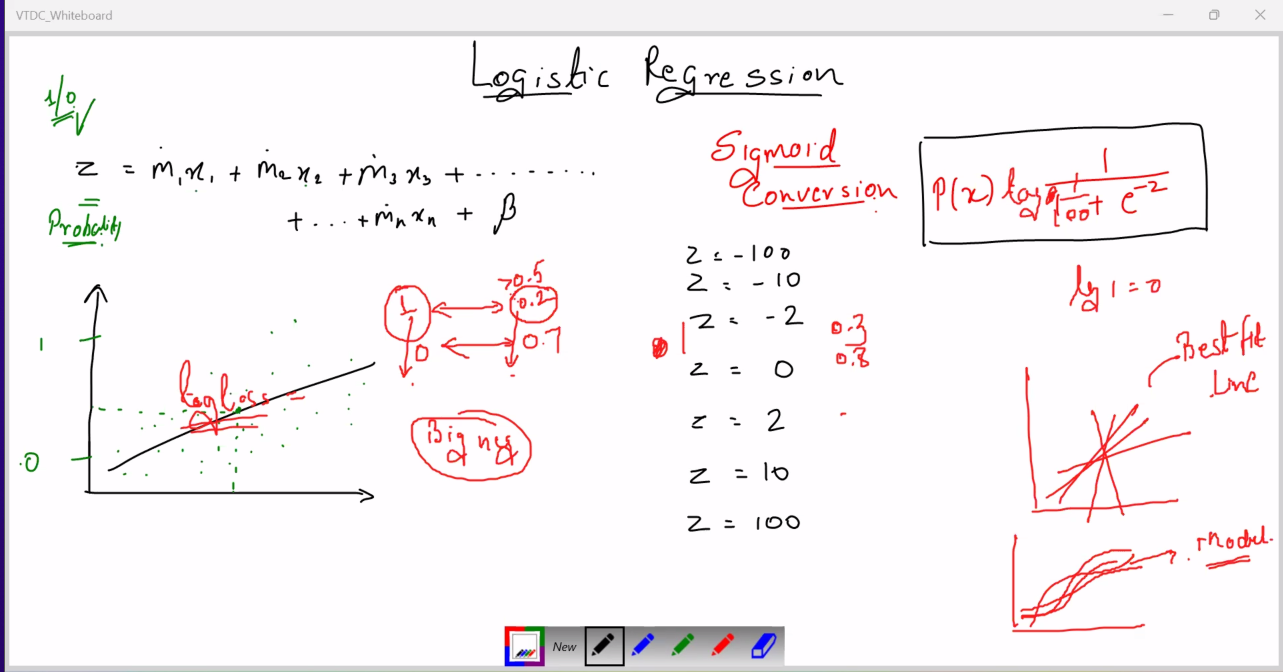

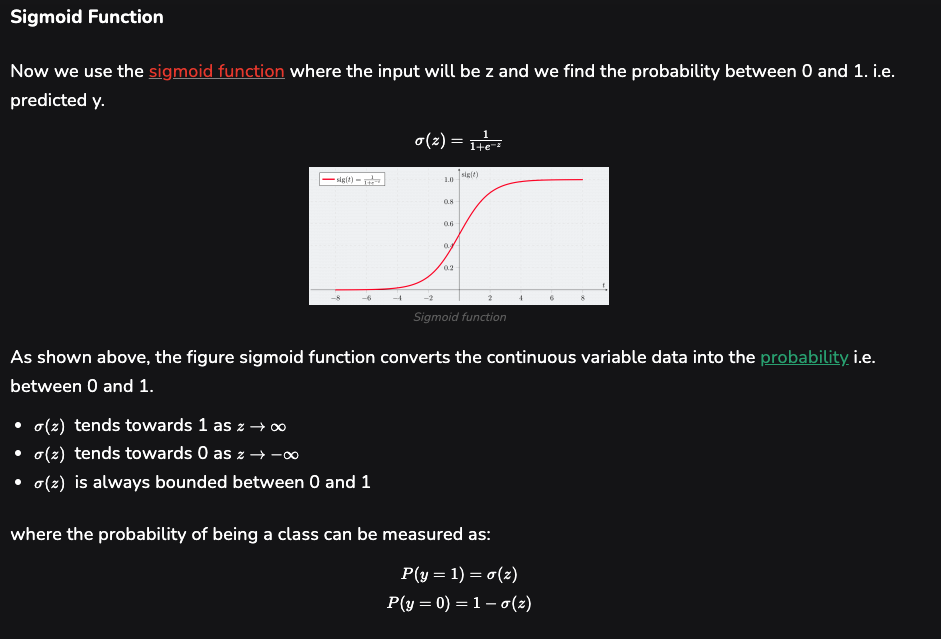

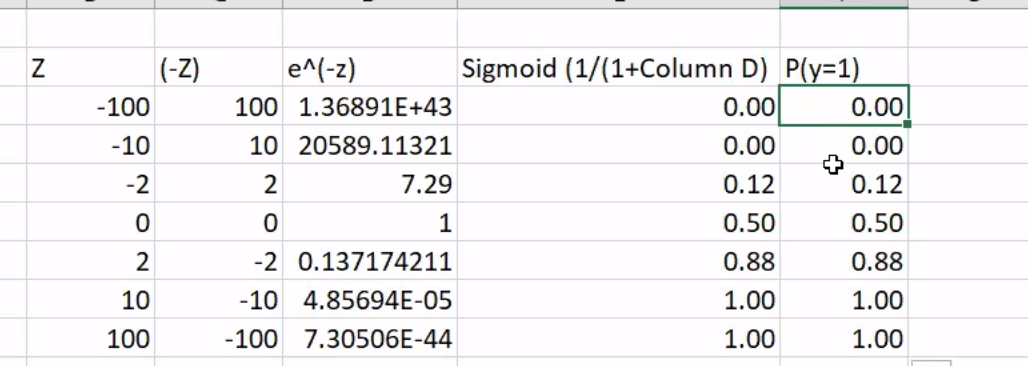

#### Log Loss Functon
Sygmoid function which is giving minimum log loss function we select it
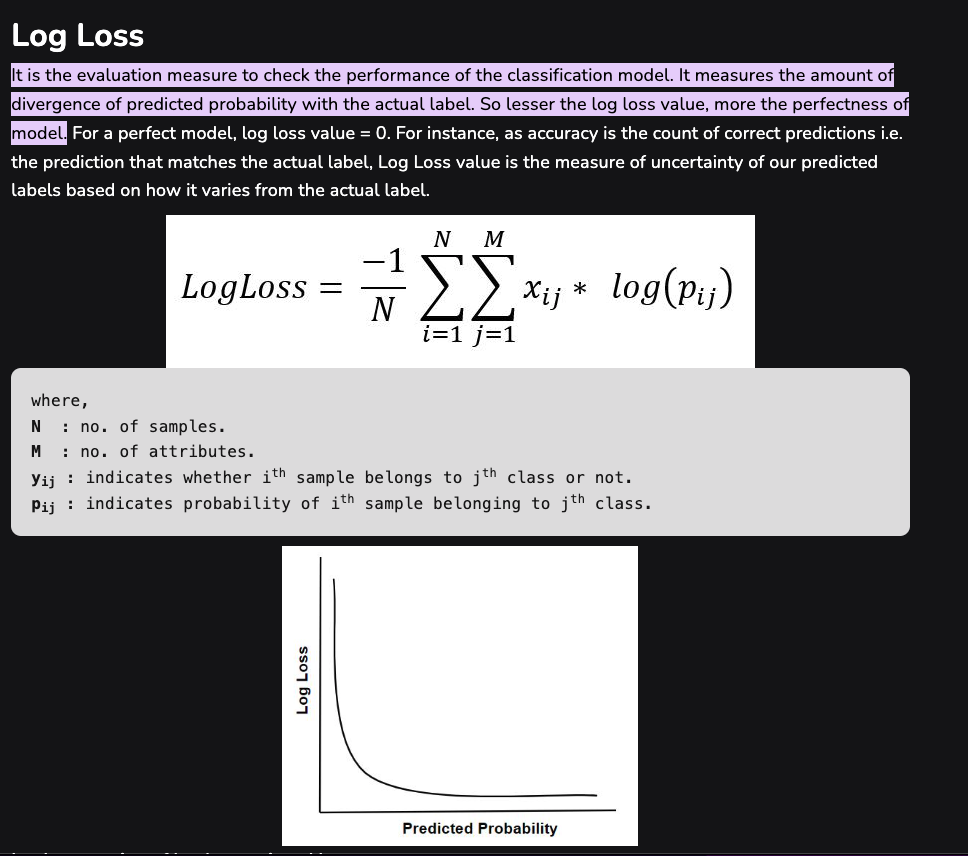 

In [55]:
x = Tel_data.drop('Churn',axis=1)
y = Tel_data[['Churn']]

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)


In [57]:
x_train.shape

(500, 18)

In [58]:
x_test.shape

(167, 18)

In [59]:
from sklearn.linear_model import LogisticRegression

In [62]:
LR = LogisticRegression()
LR

LogisticRegression()

In [63]:
LR.fit(x_train,y_train)

/Users/piyushprabhakar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/piyushprabhakar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Model Is Reday
#By default cutoff is 0.5

In [64]:
y_train_predict = LR.predict(x_train)

In [65]:
model_score_train = LR.score(x_train,y_train)
model_score_train #.87 -> 87 Precent classified correctly 

0.864

In [66]:
model_score_test = LR.score(x_test,y_test)
model_score_test #

0.874251497005988

In [ ]:
#it appears to be Good model

### Model Evaluation 
Applicable to all classification model

#### Confusion Matrix

In [69]:
from sklearn import metrics

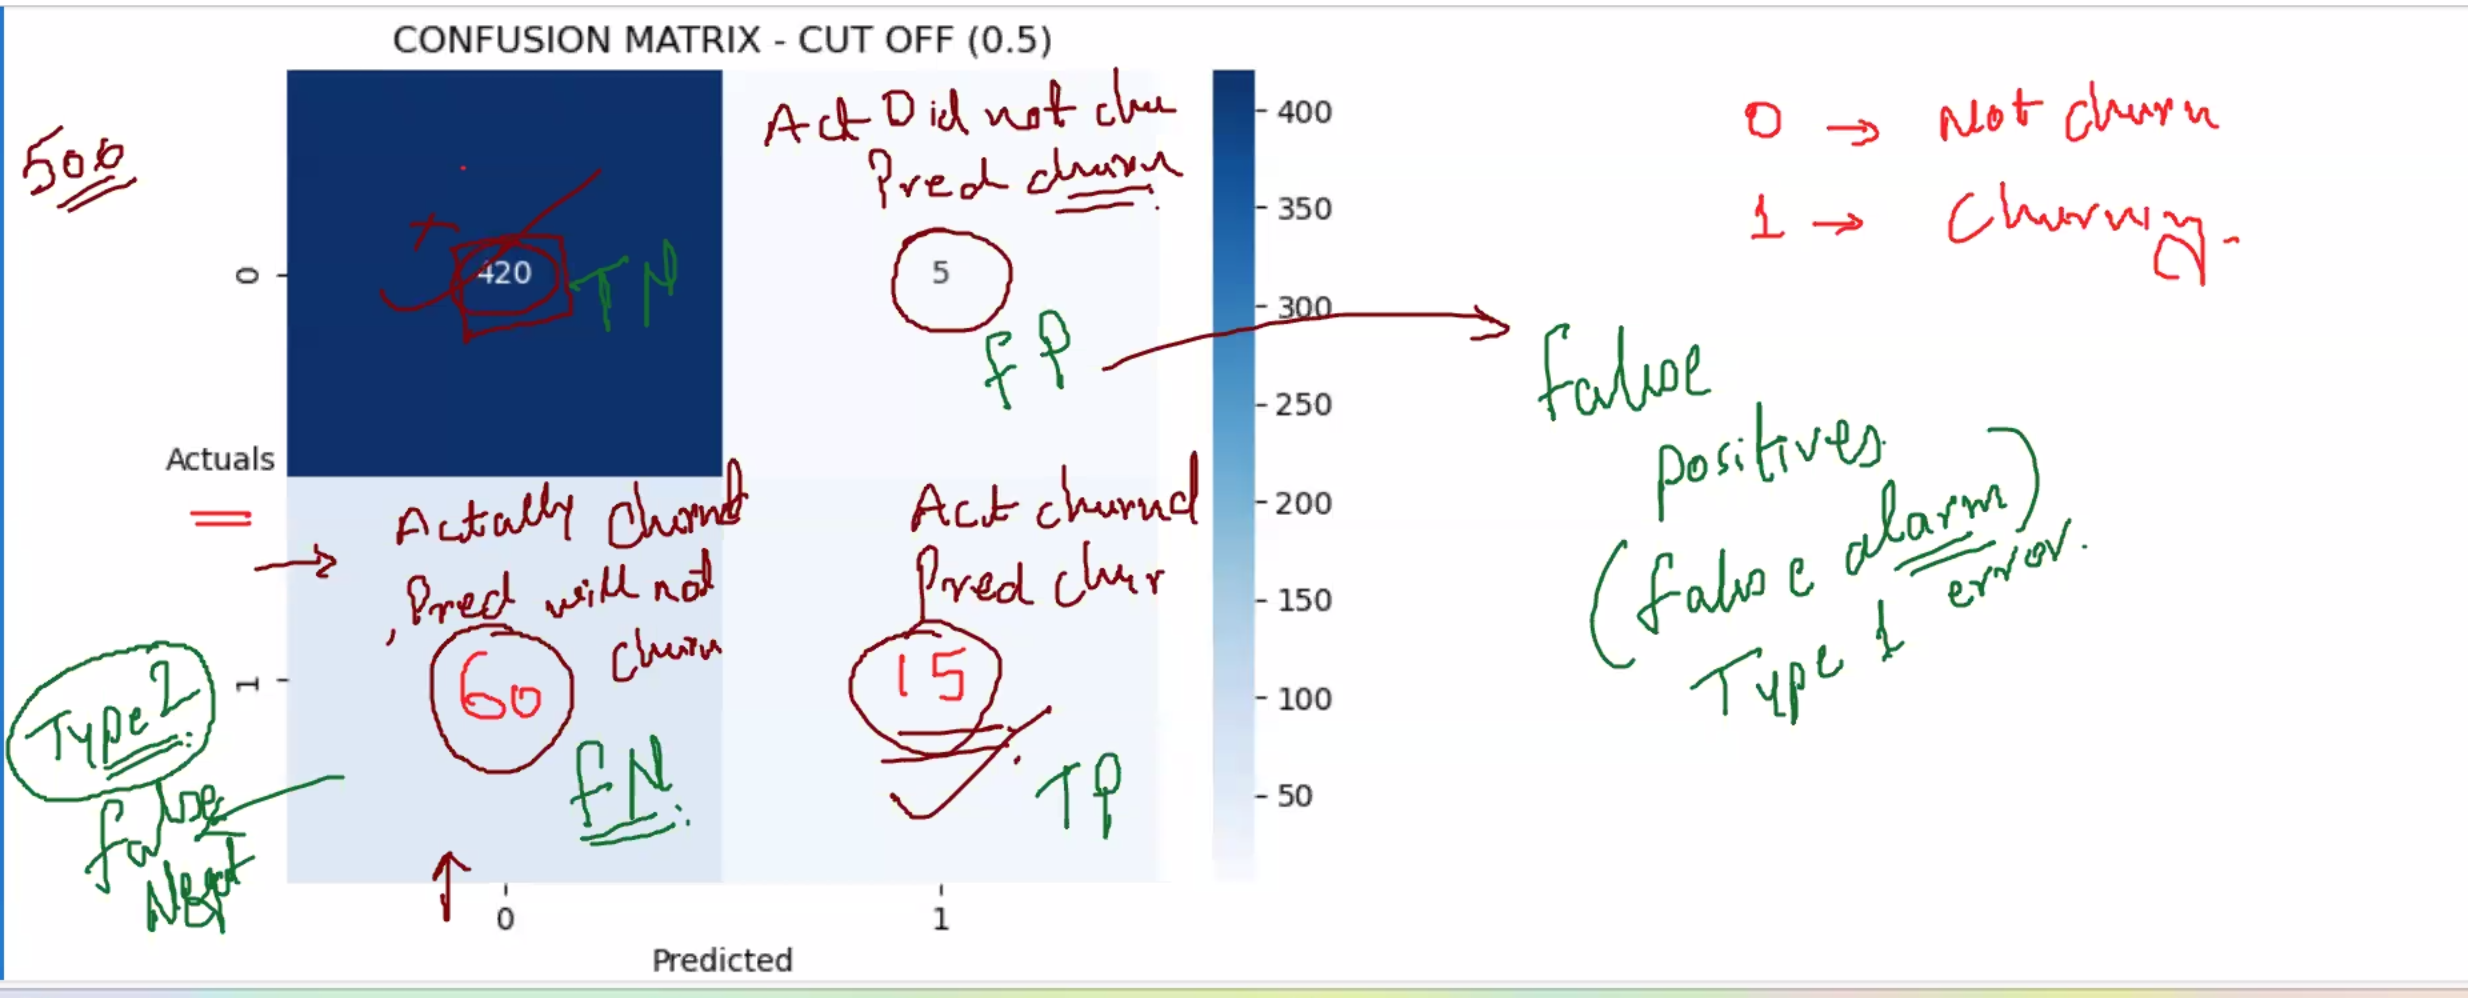

With 87% Accuracy 20% recall and hence we are no
having good mode
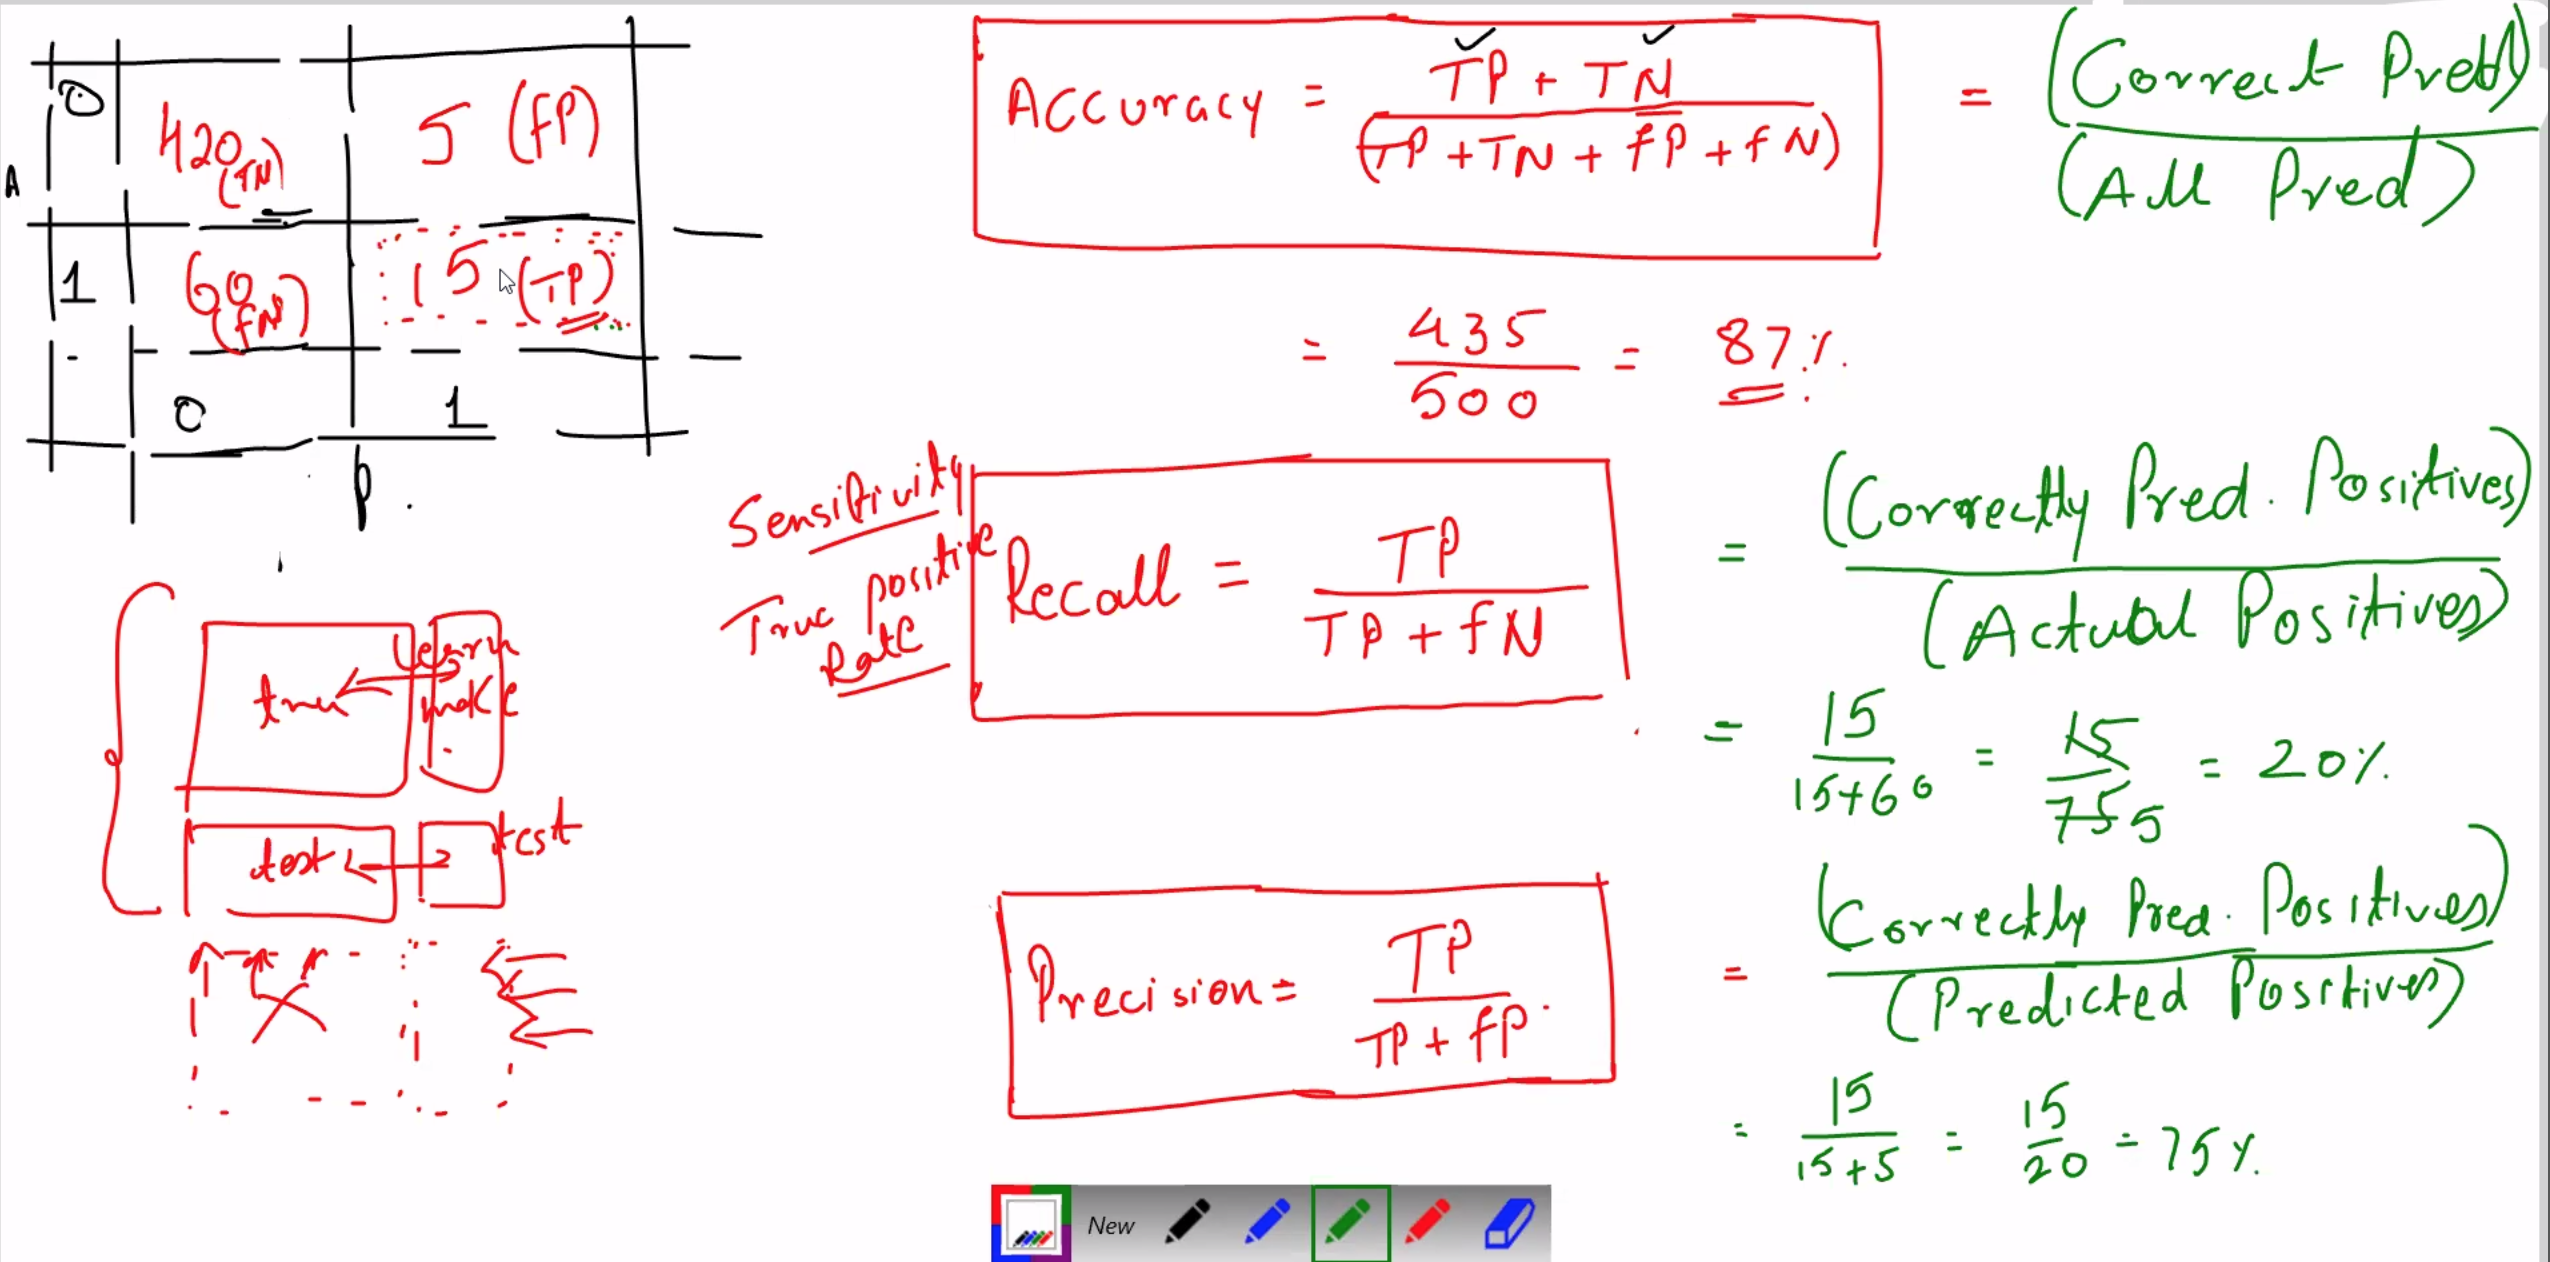

Case Where Type 1 or type 2 is important

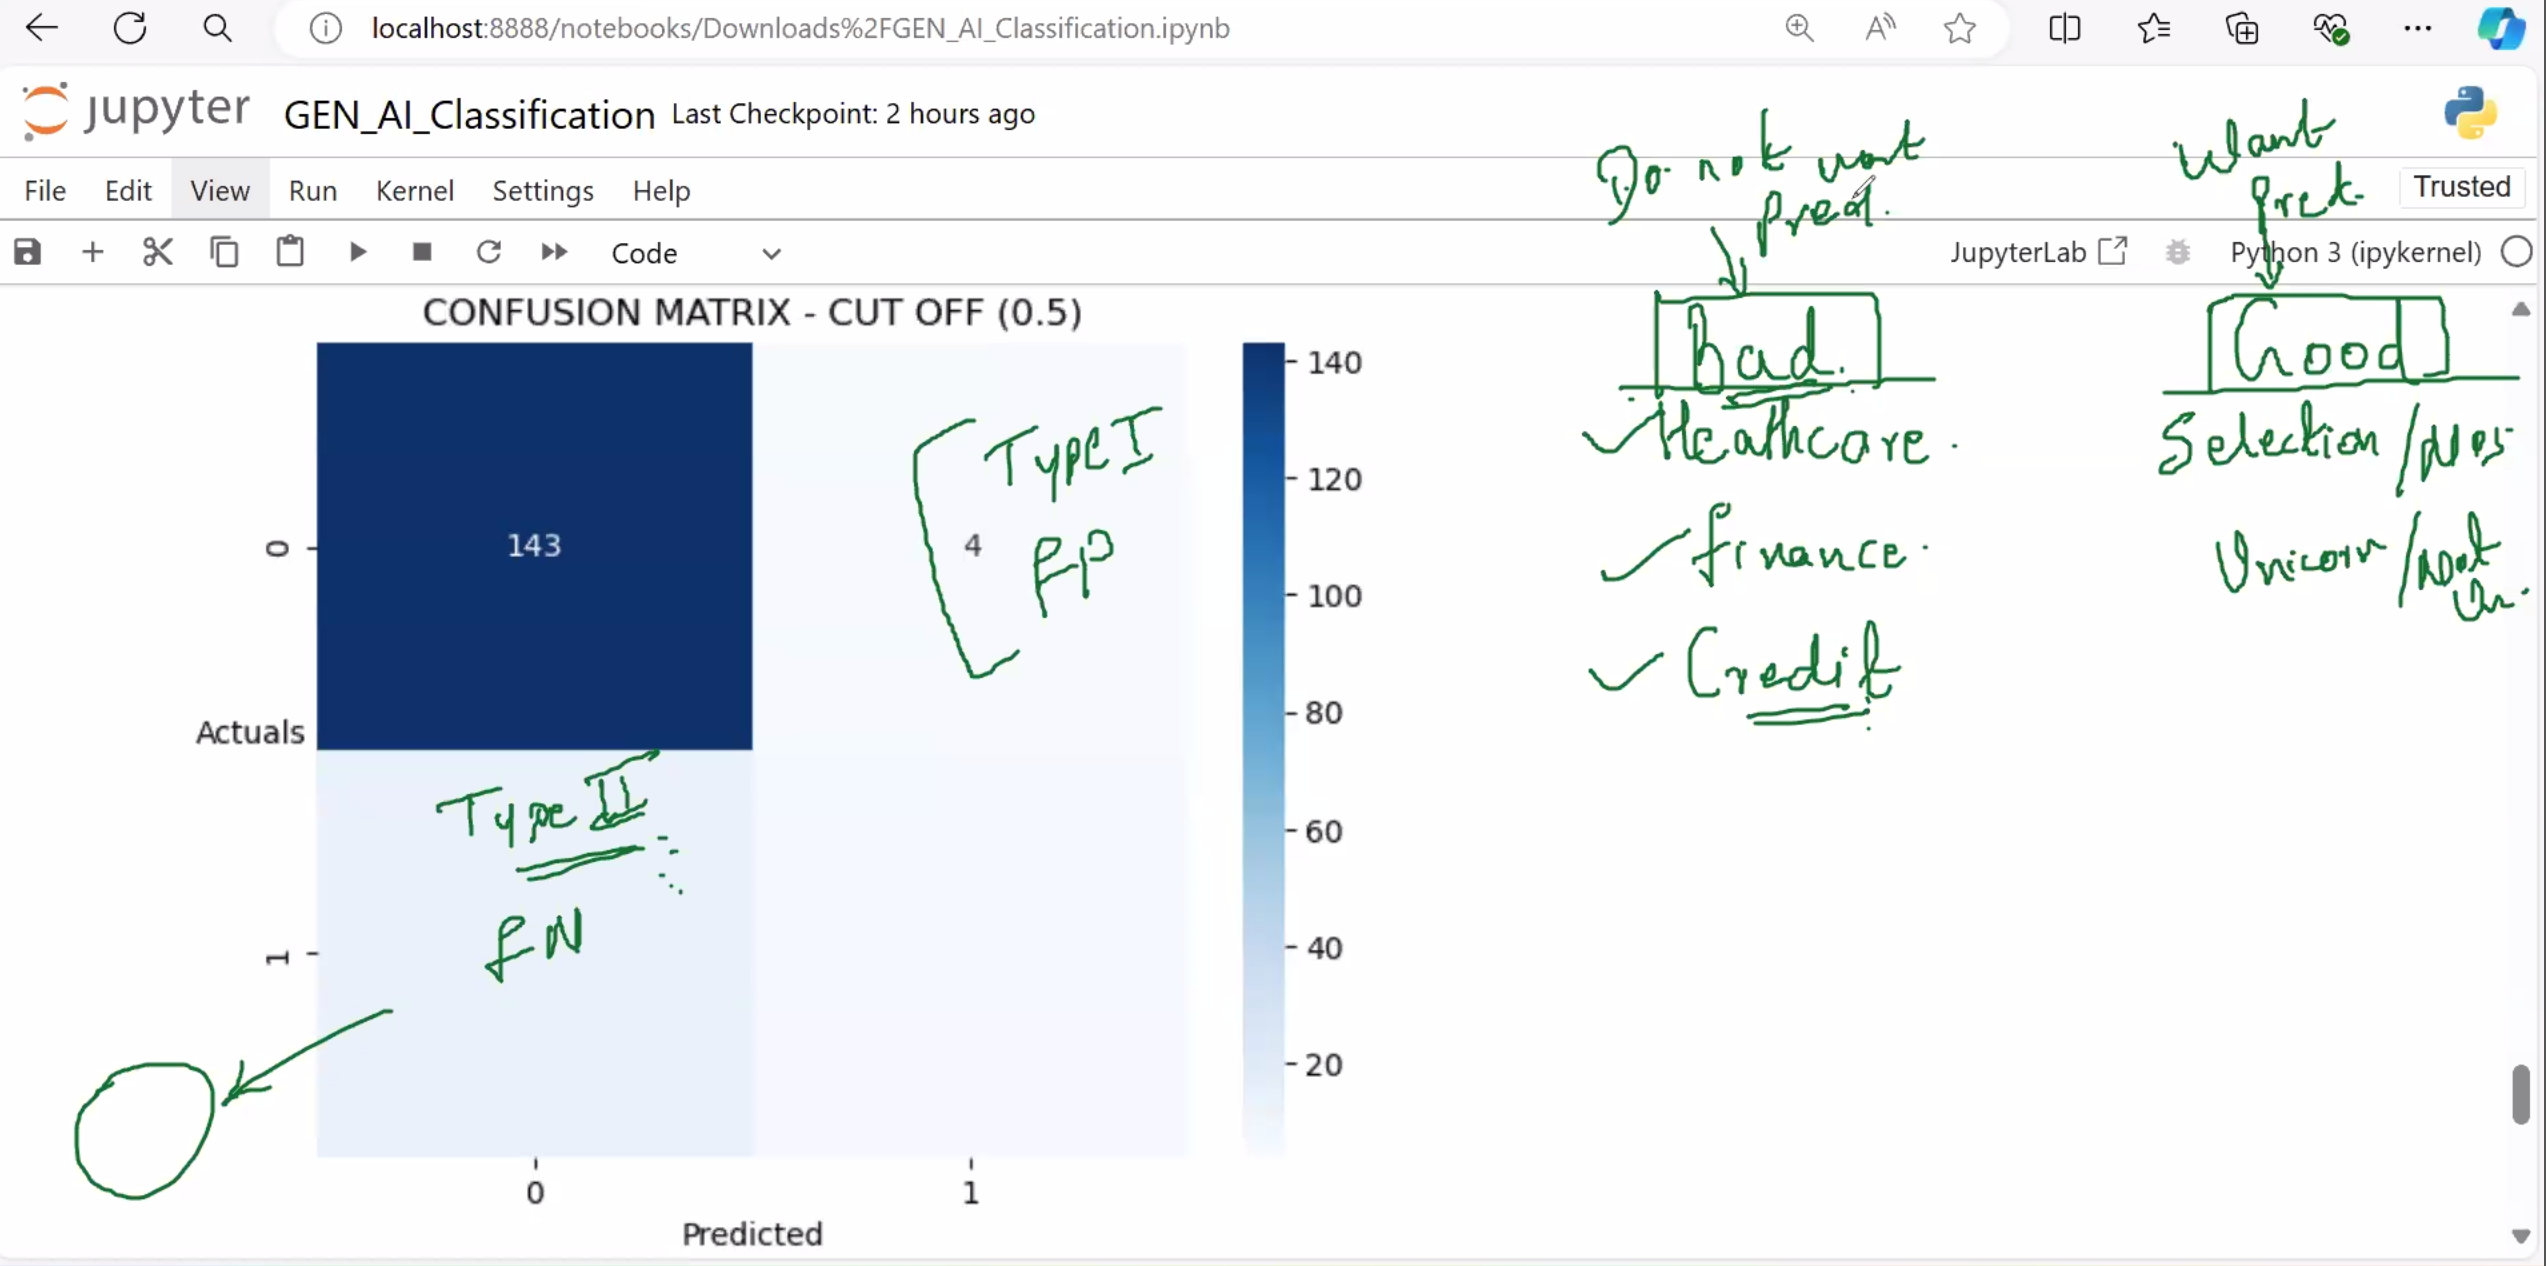

In [70]:
print(metrics.confusion_matrix(y_train, y_train_predict))

[[417   8]
 [ 60  15]]


Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

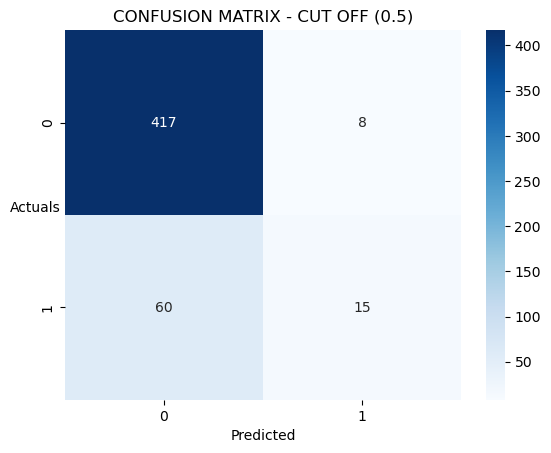

In [71]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')